In [5]:
%config Completer.use_jedi = False

In [1]:
import os

In [2]:
import numpy as np

In [3]:
file_directory_path = "/mnt/c/Users/HP/Documents/drug_labels/cleanup_no_redun"

In [3]:
import pickle
def save_obj(obj,path,name):
    with open(os.path.join(path, name + '.pkl'), 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

def load_obj(path):
    with open(path, 'rb') as f:
        return pickle.load(f)

In [4]:
def criterion (line):
    new_line = line.strip().replace('NA','')
    return any([c.isalpha() for c in new_line])

In [19]:
def func(path):
    title_list = []
    paragraph_list = []
    with open(path,'r') as f:
        for line in f:
            if line.startswith('>'):
                title_list.append(line.strip().strip('>'))
                paragraph_list.append([])
            else:
                paragraph_list[-1].append(line)
                
    return_list = []
    for i in range(3):
        return_list.append(paragraph_list[i])
    
    indic_index = -1
    contra_index = -1
    adver_index = -1
    
    ica_list = [indic_index,contra_index,adver_index]
                
    for j in range(len(ica_list)):    
        if j == 0:
            key = "INDICATION"
        elif j == 1:
            key = "CONTRAIND"
        else:
            key = "ADVERSE"
        for i in range(len(paragraph_list)):
            if len(paragraph_list[i]) >0:
                title = paragraph_list[i][0]
            else:
                continue

            if key in title.upper():
                if key == "INDICATION":
                    c_index = title.upper().index(key)
                    if c_index == 0:
                        ica_list[j] = i
                        break
                    else:
                        if title[c_index-1].lower() == 'a':
                            continue
                        else:
                            ica_list[j] = i
                            break        
                else:
                    ica_list[j] = i
                    break

#     print("first loop")
#     print(ica_list)
    for index in ica_list:
        if index == -1:
            return_list.append([])
        else:
            return_list.append([])
            if len(paragraph_list[index]) == 1:
                return_list[-1].append(paragraph_list[index][0])
                continue
            for line in paragraph_list[index][1:]:
                if criterion(line):
                    return_list[-1].append(line)
    
    if -1 in ica_list:
        for i in range(len(ica_list)):
            if ica_list[i] != -1: continue
                
            if i == 0:
                key = "INDICATION"
            elif i == 1:
                key = "CONTRAIND"
            else:
                key = "ADVERSE"
            
            
            for j in range(len(title_list)):
                if key in title_list[j].upper():
                    if key == "INDICATION":
                        c_index = title_list[j].upper().index(key)
                        if c_index == 0:
                            ica_list[i] = [j,0]
                            break
                        else:
                            if title_list[j][c_index-1].lower() == 'a':
                                continue
                            else:
                                ica_list[i] = [j,0]
                                break        
                    else:
                        ica_list[i] = [j,0]
                        break
    
    for i in range(len(ica_list)):
        if type(ica_list[i]) == list and len(ica_list[i]) == 2:
            for line in paragraph_list[ica_list[i][0]][ica_list[i][1]+1:]:
                if criterion(line):
                    if (not line.strip().isupper()) : #and (not line.strip().istitle()):
                        return_list[3+i].append(line)
                    else:
                        break
            ica_list[i] = ica_list[i][0]
    
    if -1 in ica_list:
        for i in range(len(ica_list)):
            if ica_list[i] != -1: continue
                
            if i == 0:
                key = "INDICATION"
            elif i == 1:
                key = "CONTRAIND"
            else:
                key = "ADVERSE"
            
            
            for j in range(len(paragraph_list)):
                for k in range(len(paragraph_list[j])):
                    if paragraph_list[j][k].strip().isupper() or paragraph_list[j][k].strip().istitle():
                        if key in paragraph_list[j][k].upper():
                            if key == "INDICATION":
                                c_index = paragraph_list[j][k].upper().index(key)
                                if c_index == 0:
                                    ica_list[i] = [j,k]
                                    break
                                else:
                                    if paragraph_list[j][k][c_index-1].lower() == 'a':
                                        continue
                            else:
                                ica_list[i] = [j,k]
                                break        
                else:
                    continue
                break
                    
    for i in range(len(ica_list)):
        if type(ica_list[i]) == list and len(ica_list[i]) == 2:
            for line in paragraph_list[ica_list[i][0]][ica_list[i][1]+1:]:
                if criterion(line):
                    if (not line.strip().isupper()) : #and (not line.strip().istitle()):
                        return_list[3+i].append(line)
                    else:
                        break
            ica_list[i] = ica_list[i][0]
            
    for i in range(3,6):
        if len(return_list[i]) == 0:
            ica_list[i-3] = -1
    
    if -1 in ica_list:
        print(path)
        print(ica_list)
        return ica_list, return_list#, paragraph_list
    else:
        return ica_list, return_list#, paragraph_list


In [49]:
name2id_lower = load_obj("/mnt/c/Users/HP/Documents/drug_labels/name2id_lower.pkl")
name2DBID_lower = load_obj("/mnt/c/Users/HP/Documents/drug_labels/name2DBID_lower.pkl")

ica_list,return_list,paragraph_list = func("/mnt/c/Users/HP/Documents/drug_labels/cleanup_no_redun/11115.txt")

return_list[3]

In [20]:
data_text_features = []
return_code_list = []
with os.scandir(file_directory_path) as directory:
    for entry in directory:
        if entry.name.endswith('.txt') and entry.is_file():
            return_code, return_list = func(entry.path)
            sid = entry.name[:-4]
            return_list.insert(0,[sid])
            if not -1 in return_code:
                data_text_features.append(return_list)
            else:
                return_code_list.append(return_code)
                print('------------------\n')

/mnt/c/Users/HP/Documents/drug_labels/cleanup_no_redun/10129.txt
[-1, -1, -1]
------------------

/mnt/c/Users/HP/Documents/drug_labels/cleanup_no_redun/1013.txt
[-1, -1, -1]
------------------

/mnt/c/Users/HP/Documents/drug_labels/cleanup_no_redun/10171.txt
[4, -1, -1]
------------------

/mnt/c/Users/HP/Documents/drug_labels/cleanup_no_redun/10187.txt
[-1, -1, -1]
------------------

/mnt/c/Users/HP/Documents/drug_labels/cleanup_no_redun/10188.txt
[-1, -1, -1]
------------------

/mnt/c/Users/HP/Documents/drug_labels/cleanup_no_redun/10189.txt
[-1, -1, -1]
------------------

/mnt/c/Users/HP/Documents/drug_labels/cleanup_no_redun/10190.txt
[-1, -1, -1]
------------------

/mnt/c/Users/HP/Documents/drug_labels/cleanup_no_redun/10191.txt
[-1, -1, -1]
------------------

/mnt/c/Users/HP/Documents/drug_labels/cleanup_no_redun/10192.txt
[-1, -1, -1]
------------------

/mnt/c/Users/HP/Documents/drug_labels/cleanup_no_redun/10193.txt
[-1, -1, -1]
------------------

/mnt/c/Users/HP/Docume

/mnt/c/Users/HP/Documents/drug_labels/cleanup_no_redun/13581.txt
[8, -1, -1]
------------------

/mnt/c/Users/HP/Documents/drug_labels/cleanup_no_redun/13605.txt
[-1, 8, 10]
------------------

/mnt/c/Users/HP/Documents/drug_labels/cleanup_no_redun/13611.txt
[-1, 9, 12]
------------------

/mnt/c/Users/HP/Documents/drug_labels/cleanup_no_redun/13624.txt
[-1, 8, -1]
------------------

/mnt/c/Users/HP/Documents/drug_labels/cleanup_no_redun/13636.txt
[-1, 7, 10]
------------------

/mnt/c/Users/HP/Documents/drug_labels/cleanup_no_redun/13834.txt
[-1, -1, -1]
------------------

/mnt/c/Users/HP/Documents/drug_labels/cleanup_no_redun/13836.txt
[-1, -1, 5]
------------------

/mnt/c/Users/HP/Documents/drug_labels/cleanup_no_redun/13840.txt
[-1, -1, 5]
------------------

/mnt/c/Users/HP/Documents/drug_labels/cleanup_no_redun/13841.txt
[-1, -1, 5]
------------------

/mnt/c/Users/HP/Documents/drug_labels/cleanup_no_redun/13842.txt
[-1, -1, 5]
------------------

/mnt/c/Users/HP/Documents/dru

/mnt/c/Users/HP/Documents/drug_labels/cleanup_no_redun/15030.txt
[-1, -1, -1]
------------------

/mnt/c/Users/HP/Documents/drug_labels/cleanup_no_redun/15114.txt
[-1, 8, 9]
------------------

/mnt/c/Users/HP/Documents/drug_labels/cleanup_no_redun/15191.txt
[-1, -1, 15]
------------------

/mnt/c/Users/HP/Documents/drug_labels/cleanup_no_redun/15196.txt
[-1, 8, 11]
------------------

/mnt/c/Users/HP/Documents/drug_labels/cleanup_no_redun/15211.txt
[-1, 7, -1]
------------------

/mnt/c/Users/HP/Documents/drug_labels/cleanup_no_redun/15253.txt
[-1, -1, -1]
------------------

/mnt/c/Users/HP/Documents/drug_labels/cleanup_no_redun/15302.txt
[-1, 8, -1]
------------------

/mnt/c/Users/HP/Documents/drug_labels/cleanup_no_redun/15530.txt
[-1, -1, 5]
------------------

/mnt/c/Users/HP/Documents/drug_labels/cleanup_no_redun/15589.txt
[6, -1, -1]
------------------

/mnt/c/Users/HP/Documents/drug_labels/cleanup_no_redun/15603.txt
[-1, -1, 12]
------------------

/mnt/c/Users/HP/Documents/d

/mnt/c/Users/HP/Documents/drug_labels/cleanup_no_redun/19419.txt
[-1, -1, -1]
------------------

/mnt/c/Users/HP/Documents/drug_labels/cleanup_no_redun/19478.txt
[9, -1, 12]
------------------

/mnt/c/Users/HP/Documents/drug_labels/cleanup_no_redun/19573.txt
[-1, -1, -1]
------------------

/mnt/c/Users/HP/Documents/drug_labels/cleanup_no_redun/19583.txt
[6, -1, -1]
------------------

/mnt/c/Users/HP/Documents/drug_labels/cleanup_no_redun/19597.txt
[5, -1, -1]
------------------

/mnt/c/Users/HP/Documents/drug_labels/cleanup_no_redun/19598.txt
[-1, -1, 4]
------------------

/mnt/c/Users/HP/Documents/drug_labels/cleanup_no_redun/19606.txt
[9, -1, 16]
------------------

/mnt/c/Users/HP/Documents/drug_labels/cleanup_no_redun/19620.txt
[7, -1, -1]
------------------

/mnt/c/Users/HP/Documents/drug_labels/cleanup_no_redun/19622.txt
[-1, -1, -1]
------------------

/mnt/c/Users/HP/Documents/drug_labels/cleanup_no_redun/19632.txt
[-1, -1, 5]
------------------

/mnt/c/Users/HP/Documents/d

/mnt/c/Users/HP/Documents/drug_labels/cleanup_no_redun/24064.txt
[-1, -1, -1]
------------------

/mnt/c/Users/HP/Documents/drug_labels/cleanup_no_redun/24100.txt
[-1, -1, 9]
------------------

/mnt/c/Users/HP/Documents/drug_labels/cleanup_no_redun/24366.txt
[-1, -1, -1]
------------------

/mnt/c/Users/HP/Documents/drug_labels/cleanup_no_redun/24414.txt
[-1, -1, -1]
------------------

/mnt/c/Users/HP/Documents/drug_labels/cleanup_no_redun/24539.txt
[-1, -1, -1]
------------------

/mnt/c/Users/HP/Documents/drug_labels/cleanup_no_redun/24549.txt
[-1, -1, -1]
------------------

/mnt/c/Users/HP/Documents/drug_labels/cleanup_no_redun/2458.txt
[6, 7, -1]
------------------

/mnt/c/Users/HP/Documents/drug_labels/cleanup_no_redun/2471.txt
[10, 8, -1]
------------------

/mnt/c/Users/HP/Documents/drug_labels/cleanup_no_redun/24740.txt
[-1, -1, -1]
------------------

/mnt/c/Users/HP/Documents/drug_labels/cleanup_no_redun/24761.txt
[-1, -1, -1]
------------------

/mnt/c/Users/HP/Documents/

/mnt/c/Users/HP/Documents/drug_labels/cleanup_no_redun/27629.txt
[4, -1, 8]
------------------

/mnt/c/Users/HP/Documents/drug_labels/cleanup_no_redun/27663.txt
[-1, -1, -1]
------------------

/mnt/c/Users/HP/Documents/drug_labels/cleanup_no_redun/27664.txt
[-1, -1, -1]
------------------

/mnt/c/Users/HP/Documents/drug_labels/cleanup_no_redun/27666.txt
[-1, -1, -1]
------------------

/mnt/c/Users/HP/Documents/drug_labels/cleanup_no_redun/27724.txt
[-1, -1, -1]
------------------

/mnt/c/Users/HP/Documents/drug_labels/cleanup_no_redun/27782.txt
[-1, -1, -1]
------------------

/mnt/c/Users/HP/Documents/drug_labels/cleanup_no_redun/27801.txt
[-1, -1, -1]
------------------

/mnt/c/Users/HP/Documents/drug_labels/cleanup_no_redun/27805.txt
[-1, -1, -1]
------------------

/mnt/c/Users/HP/Documents/drug_labels/cleanup_no_redun/27807.txt
[-1, -1, -1]
------------------

/mnt/c/Users/HP/Documents/drug_labels/cleanup_no_redun/27818.txt
[-1, -1, -1]
------------------

/mnt/c/Users/HP/Docume

/mnt/c/Users/HP/Documents/drug_labels/cleanup_no_redun/31994.txt
[-1, -1, -1]
------------------

/mnt/c/Users/HP/Documents/drug_labels/cleanup_no_redun/32011.txt
[-1, -1, -1]
------------------

/mnt/c/Users/HP/Documents/drug_labels/cleanup_no_redun/32040.txt
[-1, 7, 9]
------------------

/mnt/c/Users/HP/Documents/drug_labels/cleanup_no_redun/32048.txt
[-1, -1, -1]
------------------

/mnt/c/Users/HP/Documents/drug_labels/cleanup_no_redun/32070.txt
[-1, 8, 10]
------------------

/mnt/c/Users/HP/Documents/drug_labels/cleanup_no_redun/3211.txt
[4, 4, -1]
------------------

/mnt/c/Users/HP/Documents/drug_labels/cleanup_no_redun/32138.txt
[-1, -1, -1]
------------------

/mnt/c/Users/HP/Documents/drug_labels/cleanup_no_redun/32172.txt
[-1, -1, -1]
------------------

/mnt/c/Users/HP/Documents/drug_labels/cleanup_no_redun/32217.txt
[-1, -1, -1]
------------------

/mnt/c/Users/HP/Documents/drug_labels/cleanup_no_redun/32254.txt
[4, -1, -1]
------------------

/mnt/c/Users/HP/Documents/d

/mnt/c/Users/HP/Documents/drug_labels/cleanup_no_redun/34886.txt
[5, -1, -1]
------------------

/mnt/c/Users/HP/Documents/drug_labels/cleanup_no_redun/34891.txt
[-1, -1, -1]
------------------

/mnt/c/Users/HP/Documents/drug_labels/cleanup_no_redun/34926.txt
[-1, -1, -1]
------------------

/mnt/c/Users/HP/Documents/drug_labels/cleanup_no_redun/34981.txt
[-1, -1, -1]
------------------

/mnt/c/Users/HP/Documents/drug_labels/cleanup_no_redun/34995.txt
[-1, 9, 11]
------------------

/mnt/c/Users/HP/Documents/drug_labels/cleanup_no_redun/35010.txt
[-1, -1, -1]
------------------

/mnt/c/Users/HP/Documents/drug_labels/cleanup_no_redun/35029.txt
[-1, -1, -1]
------------------

/mnt/c/Users/HP/Documents/drug_labels/cleanup_no_redun/35110.txt
[-1, 8, 11]
------------------

/mnt/c/Users/HP/Documents/drug_labels/cleanup_no_redun/35114.txt
[-1, -1, -1]
------------------

/mnt/c/Users/HP/Documents/drug_labels/cleanup_no_redun/35182.txt
[-1, 4, -1]
------------------

/mnt/c/Users/HP/Document

/mnt/c/Users/HP/Documents/drug_labels/cleanup_no_redun/39005.txt
[5, -1, -1]
------------------

/mnt/c/Users/HP/Documents/drug_labels/cleanup_no_redun/39009.txt
[-1, -1, -1]
------------------

/mnt/c/Users/HP/Documents/drug_labels/cleanup_no_redun/39025.txt
[5, -1, -1]
------------------

/mnt/c/Users/HP/Documents/drug_labels/cleanup_no_redun/39026.txt
[5, -1, -1]
------------------

/mnt/c/Users/HP/Documents/drug_labels/cleanup_no_redun/39054.txt
[5, -1, -1]
------------------

/mnt/c/Users/HP/Documents/drug_labels/cleanup_no_redun/39066.txt
[5, -1, -1]
------------------

/mnt/c/Users/HP/Documents/drug_labels/cleanup_no_redun/3907.txt
[-1, -1, -1]
------------------

/mnt/c/Users/HP/Documents/drug_labels/cleanup_no_redun/39077.txt
[-1, -1, -1]
------------------

/mnt/c/Users/HP/Documents/drug_labels/cleanup_no_redun/39081.txt
[5, -1, -1]
------------------

/mnt/c/Users/HP/Documents/drug_labels/cleanup_no_redun/39103.txt
[-1, -1, -1]
------------------

/mnt/c/Users/HP/Documents/d

/mnt/c/Users/HP/Documents/drug_labels/cleanup_no_redun/40371.txt
[-1, -1, -1]
------------------

/mnt/c/Users/HP/Documents/drug_labels/cleanup_no_redun/40401.txt
[6, -1, -1]
------------------

/mnt/c/Users/HP/Documents/drug_labels/cleanup_no_redun/40402.txt
[-1, -1, -1]
------------------

/mnt/c/Users/HP/Documents/drug_labels/cleanup_no_redun/40418.txt
[-1, -1, -1]
------------------

/mnt/c/Users/HP/Documents/drug_labels/cleanup_no_redun/40430.txt
[-1, -1, -1]
------------------

/mnt/c/Users/HP/Documents/drug_labels/cleanup_no_redun/40502.txt
[-1, -1, -1]
------------------

/mnt/c/Users/HP/Documents/drug_labels/cleanup_no_redun/40504.txt
[-1, 7, 25]
------------------

/mnt/c/Users/HP/Documents/drug_labels/cleanup_no_redun/40526.txt
[-1, -1, -1]
------------------

/mnt/c/Users/HP/Documents/drug_labels/cleanup_no_redun/40536.txt
[-1, 8, 11]
------------------

/mnt/c/Users/HP/Documents/drug_labels/cleanup_no_redun/4067.txt
[-1, -1, -1]
------------------

/mnt/c/Users/HP/Document

/mnt/c/Users/HP/Documents/drug_labels/cleanup_no_redun/4596.txt
[-1, -1, -1]
------------------

/mnt/c/Users/HP/Documents/drug_labels/cleanup_no_redun/4636.txt
[-1, -1, -1]
------------------

/mnt/c/Users/HP/Documents/drug_labels/cleanup_no_redun/4697.txt
[6, -1, -1]
------------------

/mnt/c/Users/HP/Documents/drug_labels/cleanup_no_redun/4766.txt
[-1, -1, -1]
------------------

/mnt/c/Users/HP/Documents/drug_labels/cleanup_no_redun/4801.txt
[6, -1, -1]
------------------

/mnt/c/Users/HP/Documents/drug_labels/cleanup_no_redun/4834.txt
[5, -1, -1]
------------------

/mnt/c/Users/HP/Documents/drug_labels/cleanup_no_redun/4836.txt
[5, -1, -1]
------------------

/mnt/c/Users/HP/Documents/drug_labels/cleanup_no_redun/4838.txt
[13, -1, -1]
------------------

/mnt/c/Users/HP/Documents/drug_labels/cleanup_no_redun/4841.txt
[9, -1, -1]
------------------

/mnt/c/Users/HP/Documents/drug_labels/cleanup_no_redun/5052.txt
[5, -1, 11]
------------------

/mnt/c/Users/HP/Documents/drug_label

/mnt/c/Users/HP/Documents/drug_labels/cleanup_no_redun/6676.txt
[6, 7, -1]
------------------

/mnt/c/Users/HP/Documents/drug_labels/cleanup_no_redun/6678.txt
[-1, 6, -1]
------------------

/mnt/c/Users/HP/Documents/drug_labels/cleanup_no_redun/6683.txt
[-1, 6, -1]
------------------

/mnt/c/Users/HP/Documents/drug_labels/cleanup_no_redun/6689.txt
[-1, -1, -1]
------------------

/mnt/c/Users/HP/Documents/drug_labels/cleanup_no_redun/6725.txt
[-1, -1, -1]
------------------

/mnt/c/Users/HP/Documents/drug_labels/cleanup_no_redun/6727.txt
[-1, 5, -1]
------------------

/mnt/c/Users/HP/Documents/drug_labels/cleanup_no_redun/6746.txt
[-1, -1, -1]
------------------

/mnt/c/Users/HP/Documents/drug_labels/cleanup_no_redun/6795.txt
[-1, 5, -1]
------------------

/mnt/c/Users/HP/Documents/drug_labels/cleanup_no_redun/6802.txt
[-1, -1, -1]
------------------

/mnt/c/Users/HP/Documents/drug_labels/cleanup_no_redun/6803.txt
[-1, -1, -1]
------------------

/mnt/c/Users/HP/Documents/drug_label

In [21]:
rc_np = np.array(return_code_list)

In [22]:
rc_np.shape

(1325, 3)

In [162]:
np.count_nonzero(rc_np[:,1] == -1) 

883

In [163]:
len(data_text_features[0])

7

In [23]:
ddi_test_id = load_obj("/mnt/c/Users/HP/Documents/drug_labels/ddi_test_set_id.pkl")


In [24]:
len(ddi_test_id)

32192

In [25]:
test_id = []
for a in ddi_test_id:
    test_id.append(a[0])
    test_id.append(a[1])
test_id = list(set(test_id))

In [26]:
len(test_id)

558

In [27]:
data_text_features_id = [int(a[0][0]) for a in data_text_features]

In [28]:
len(data_text_features_id)

6650

In [29]:
missing_id= []
non_missing_id = []
for id in test_id:
    if id in data_text_features_id:
        non_missing_id.append(id)
    

In [30]:
len(non_missing_id)

511

In [31]:
ddi_test_id_w_features = []
for idpair in ddi_test_id:
    if idpair[0] in non_missing_id and idpair[1] in non_missing_id:
        ddi_test_id_w_features.append(idpair)

In [32]:
len(ddi_test_id_w_features)

26441

In [39]:
test_id = []
for a in ddi_test_id_w_features:
    test_id.append(a[0])
    test_id.append(a[1])
test_id = list(set(test_id))

In [40]:
len(test_id)

510

In [42]:
test_id[50]

41164

In [41]:
save_obj(test_id,os.path.dirname(file_directory_path),"test_id_w_ground_truth")

In [33]:
save_obj(ddi_test_id_w_features,os.path.dirname(file_directory_path),"ddi_test_id_w_features")

In [34]:
save_obj(data_text_features,os.path.dirname(file_directory_path),"data_text_features")

In [37]:
for d in data_text_features:
    print(d[1])
    if len([_.strip() for _ in d[4]]) ==0: #or len([_.strip() for _ in d[5]]) == 0 or len([_.strip() for _ in d[6]]) == 0:
        print(d[0])

['Renese\n']
['Mykrox Tablets\n']
['Trovan\n']
['Deferoxamine mesylate\n']
['EPIsnap Epinephrine Convenience Kit\n']
['epinephrinesnap-v\n']
['UREA HYDRATING TOPICAL\n']
['Calcium Folic Acid Plus D Chewable\n']
['Labetalol\n']
['VANIQA\n']
['Strovite One\n']
['Quinapril Hydrochloride/Hydrochlorothiazide\n']
['NuDiclo SoluPak\n']
['FML-S\n']
['Sodium Iodide I 123\n']
['TopiDex\n']
['AgonEaze\n']
['Silver Sulfadiazene\n']
['NOXIFOL-D\n']
['ROXIFOL-D\n']
['Naltrexone\n']
['EPTIFIBATIDE\n']
['28.5% Salicylic Acid\n']
['Nystatin Topical Powder\n']
['Rifabutin\n']
['ampicillin\n']
['Flunisolide\n']
['Treatment Set TS336682 Treatment Set TS336667 Treatment Set TS336683\n']
['Fluocinolone acetonide 0.01%\n']
['Flac Otic Oil\n']
['TELMISARTAN and HYDROCHLOROTHIAZIDE\n']
['FENTANYL TRANSDERMAL SYSTEM\n']
['Decadron\n']
['Propoxyphene Hydrochloride and Acetaminophen\n']
['Aromasin\n']
['PR Benzoyl Peroxide Wash\n']
['CAMILA\n']
['Hailey 1.5/30\n']
['Endrate\n']
['ESTROSTEP Fe\n']
['Capex\n']
['Me

['Cardizem LA\n']
['Chloroquine Phosphate\n']
['Clozaril\n']
['HERZUMA\n']
['Ledipasvir and Sofosbuvir\n']
['Photofrin\n']
['Tramadol hydrochloride and acetaminophen\n']
['DALFAMPRIDINE\n']
['INDOCIN\n']
['TABLOID\n']
['PERTZYE\n']
['Betoptic Pilo\n']
['Acthar\n']
['JINTELI\n']
['Erythrocin Lactobionate\n']
['Dextroamphetamine Saccharate, Amphetamine Aspartate Monohydrate, Dextroamphetamine Sulfate, Amphetamine Sulfate Extended-Release\n']
['Sarclisa\n']
['Thyrogen\n']
['Rasuvo\n']
['PROCYSBI\n']
['TEPADINA\n']
['ZOHYDRO ER\n']
['caspofungin acetate Caspofungin Acetate\n']
['BUSULFEX\n']
['Cetamide Isopto Cetamide\n']
['ED-SPAZ\n']
['QUZYTTIR\n']
['Isturisa\n']
['Cleocin\n']
['cinacalcet hydrochloride\n']
['ADLYXIN\n']
['Fluorescein Sodium and Benoxinate Hydrochloride\n']
['atovaquone\n']
['Nouress\n']
['TaperDex 6-day\n']
['Pirnuo\n']
['NICARDIPINE HYDROCHLORIDE\n']
['AMIDATE(TM) ETOMIDATE\n']
['BELSOMRA\n']
['NORITATE\n']
['Sodium Fluoride 5000 ppm Sensitive\n']
['RIFAMPIN\n']
['HALO

['TAZORAC\n']
['Labetalol hydrochloride\n']
['CRESTOR\n']
['Afinitor\n']
['Dextroamphetamine Saccharate, Amphetamine Aspartate Monohydrate, Dextroamphetamine Sulfate, and Amphetamine Sulfate Extended-Release\n']
['DIPHENHYDRAMINE\n']
['Desferal\n']
['memantine hydrochloride\n']
['Fluoroplex\n']
['emtricitabine\n']
['SUNOSI\n']
['PANDEL\n']
['Efavirenz, Emtricitabine and Tenofovir Disoproxil Fumarate\n']
['CAPASTAT SULFATE\n']
['AK-FLUOR\n']
['Hemady\n']
['ApexiCon E\n']
['Cogentin\n']
['Alfentanil\n']
['Verapamil hydrochloride\n']
['Pentobarbital Sodium\n']
['Sodium Diuril\n']
['Neomycin and Polymyxin B Sulfates, and Bacitracin Zinc\n']
['Betimol\n']
['Chantix\n']
['POLYMYXIN B SULFATE AND TRIMETHOPRIM\n']
['BENZACLIN\n']
['Nembutal Sodium\n']
['Diprivan\n']
['AMELUZ\n']
['CONDITION AND ENHANCE BLENDER CONDITION AND ENHANCE CLEAR\n']
['EpinephrineSnap-EMS\n']
['EpinephrineSnap-V\n']
['OSCIMIN\n']
['Sufentanil Citrate\n']
['Levitra\n']
['ZIOPTAN\n']
['Tetracaine\n']
['Nedocromil Sodium\

['Avalide\n']
['MYDAYIS\n']
['Kurvelo\n']
['SILODOSIN\n']
['Anthim\n']
['Omeprazole and Sodium Bicrabonate\n']
['RECOTHROM\n']
['Proctosol-HC\n']
['Teriflunomide\n']
['PHENOBARBITAL WITH BELLADONNA ALKALOIDS\n']
['NeoProfen\n']
['Sodium sulfacetamide\n']
['RIZATRIPTAN Benzoate\n']
['Diclofenac Epolamine\n']
['Clobetasol Propionate Cream\n']
['Diflorasone Diacetate Oint\n']
['Econazole Nitrate\n']
['Fluocinonide Gel\n']
['Benznidazole\n']
['Cosmegen\n']
['Voltaren\n']
['Lysteda\n']
['LOVASTATIN\n']
['Lactulose Solution\n']
['Rabeprazole sodium\n']
['Conjupri\n']
['Phenohytro\n']
['Smoflipid\n']
['LEVALBUTEROL\n']
['Perphenazine and Amitriptyline Hydrochloride\n']
['Vecamyl\n']
['Nitrofurantion Macrocrystals\n']
['bupropion\n']
['BYFAVO\n']
['INVOKANA\n']
['Duloxetine hydrochloride\n']
['ASTAGRAF XL\n']
['Zyvox\n']
['pentamidine isethionate\n']
['tizanidine hydrochloride\n']
['levofloxacin\n']
['Avapro\n']
['Vantas\n']
['Dorzolamide hydrochloride\n']
['Prograf\n']
['PRILOVIX Lite\n']
['v

['Montelukast Sodium\n']
['TOBI Podhaler\n']
['Amoxicillin and Clavulanate Potassium\n']
['Zemplar\n']
['Fluconazole\n']
['Buprenorphine Hydrochloride and Naloxone Hydrochloride Dihydrate\n']
['tizanidine\n']
['Hydromorphone Hydrochloride\n']
['Wakix\n']
['Nabumetone\n']
['Ixinity\n']
['Betamethasone Dipropionate\n']
['Ibuprofen\n']
['Fenofibrate\n']
['Reyvow\n']
['Droxidopa\n']
['Lidocaine\n']
['IMPAVIDO\n']
['Sotalol Hydrochloride\n']
['Fluvoxamine Maleate\n']
['OMEGA-3-ACID ETHYL ESTERS\n']
['Sodium Fluoride 5000 ppm Dry Mouth\n']
['Levetiracetam\n']
['GLEOLAN\n']
['Bloxiverz\n']
['Doxycycline\n']
['Mirtazapine\n']
['Mycophenolate Mofetil\n']
['fenofibrate\n']
['Enalapril Maleate\n']
['DESCOVY\n']
['Amoxicillin\n']
['Vestura\n']
['Atenolol\n']
['PAROXETINE\n']
['AMIODARONE HYDROCHLORIDE\n']
['Sodium Phenylacetate and sodium benzoate\n']
['Artesunate\n']
['OPANA\n']
['Axert\n']
['Lopressor HCT\n']
['Antibiotic Ear (Neo/Polym/HC)\n']
['BACTROBAN\n']
['Octreotide acetate\n']
['AUGMENTI

In [6]:
data_text_features = load_obj("/mnt/c/Users/HP/Documents/drug_labels/data_text_features.pkl")

In [7]:
indi_list = []
contra_list = []
adv_list = []
for a in data_text_features:
    indi_list.append(a[4])
    contra_list.append(a[5])
    adv_list.append(a[6])

In [8]:
len(indi_list)

6650

In [9]:
def word_count(sentence_list):
    sen_np = np.array(sentence_list)
    count = 0
    for i in sen_np:
        count += len(str(i).split())
    return count

In [10]:
indi_count = []
contra_count = []
adv_count = []
for a in indi_list:
    indi_count.append(word_count(a))
for a in contra_list:
    contra_count.append(word_count(a))
for a in adv_list:
    adv_count.append(word_count(a))

In [326]:
indi_np = np.array(indi_count)

In [329]:
index = np.nonzero(indi_np>500)[0]

In [330]:
for i in index:
    print('----------------------')
    print(data_text_features[i][0])
    print(data_text_features[i][4])
    print("----------------------------")

----------------------
['10380']
['1. Indications\n', 'Progestin-only oral contraceptives are indicated for the prevention of pregnancy.\n', '2. Efficacy\n', 'If used perfectly, the first-year failure rate for progestin-only oral contraceptives is 0.5%. However, the typical failure rate is estimated to be closer to 5%, due to late or omitted pills. The following table lists the pregnancy rates for users of all major methods of contraception.\n', 'Table 2: Percentage of Women Experiencing an Unintended Pregnancy During the First Year of Typical Use and the First Year of Perfect Use of Contraception and the Percentage Continuing Use at the End of the First Year. United States.\n', '% of Women Experiencing an Unintended Pregnancy within the First Year of Use\n', '% of Women Continuing Use at One Year\n', 'Method(1)\n', 'Typical UseAmong typical couples who initiate use of a method (not necessarily for the first time), the percentage who experience an accidental pregnancy during the first 

In [12]:
import matplotlib.pyplot as plt

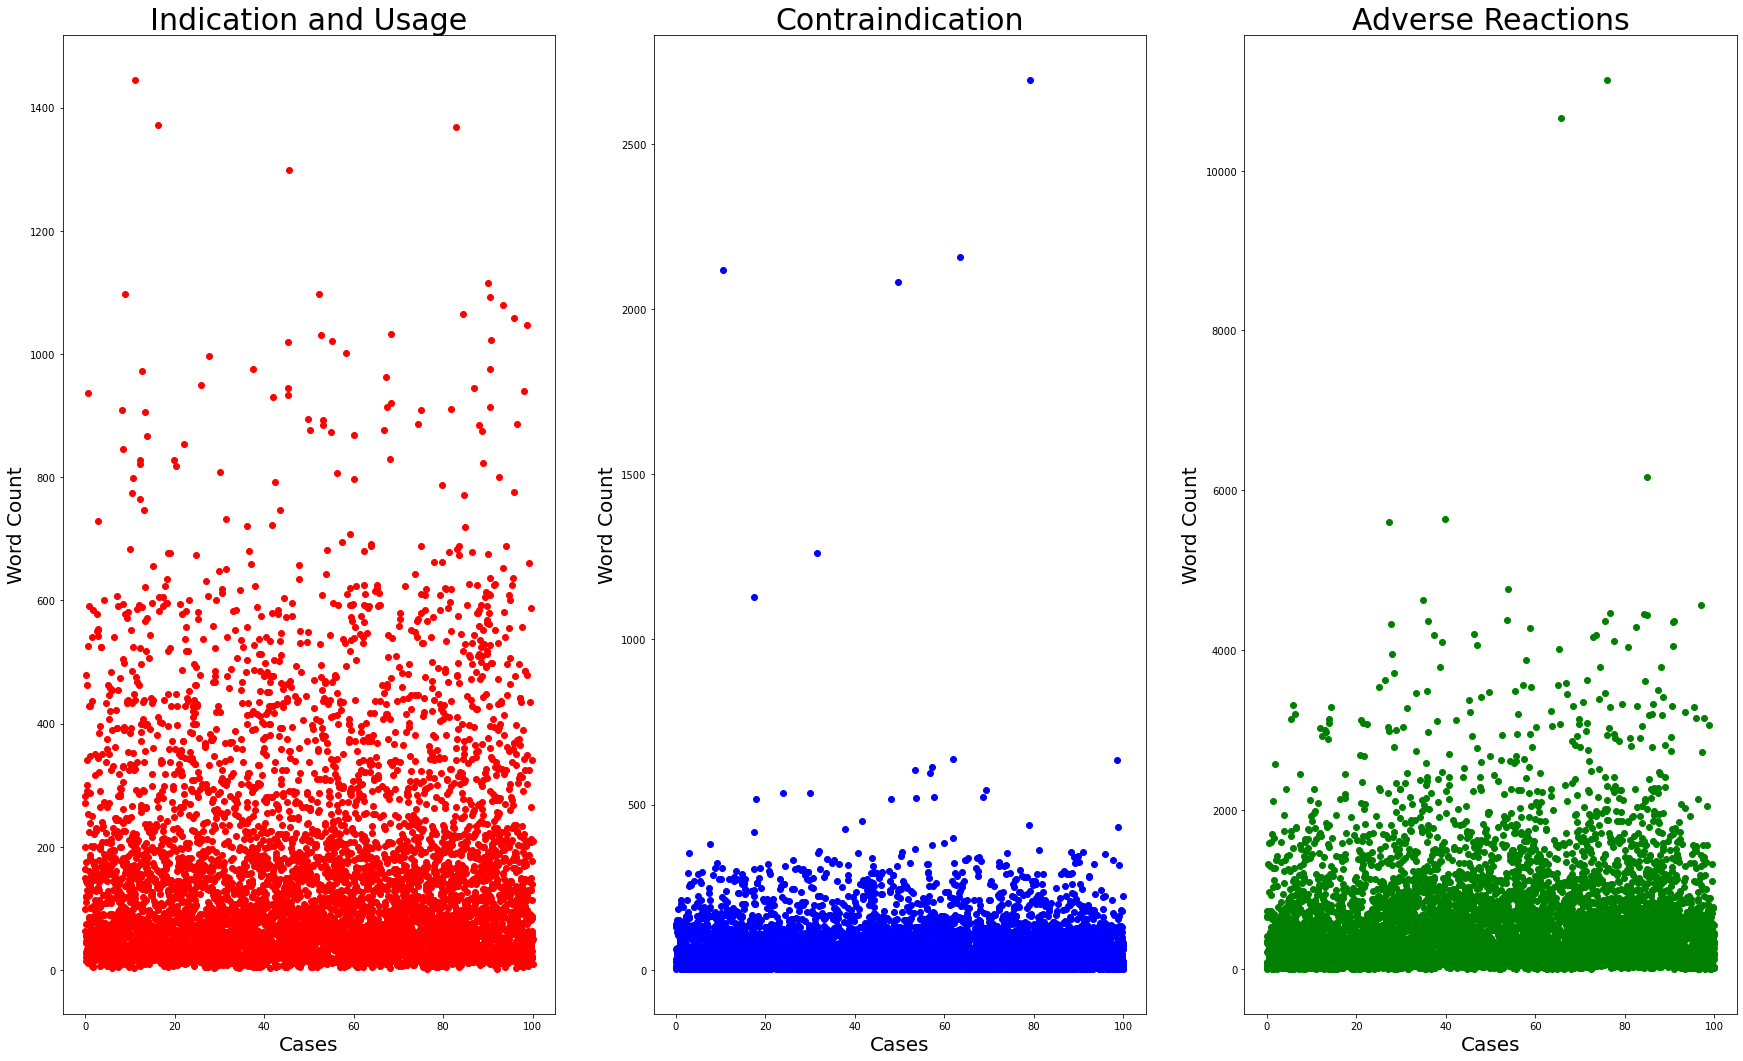

In [13]:
fig = plt.figure(figsize=(30, 18))
t = np.linspace(0,100,len(indi_count))
ax1 = fig.add_subplot(1,3,1)
ax1.plot(t, indi_count, 'ro', label = "Indication and Usage")
ax1.set_xlabel('Cases',fontsize = 20)
ax1.set_ylabel('Word Count',fontsize = 20)
ax1.set_title(f'Indication and Usage',fontsize=30)


ax2 = fig.add_subplot(1,3,2)
ax2.plot(t, contra_count, 'bo')
ax2.set_xlabel('Cases',fontsize = 20)
ax2.set_ylabel('Word Count',fontsize = 20)
ax2.set_title(f'Contraindication',fontsize=30)

ax3 = fig.add_subplot(1,3,3)
ax3.plot(t, adv_count, 'go')
ax3.set_xlabel('Cases',fontsize = 20)
ax3.set_ylabel('Word Count',fontsize = 20)
ax3.set_title(f'Adverse Reactions',fontsize=30)

plt.show()

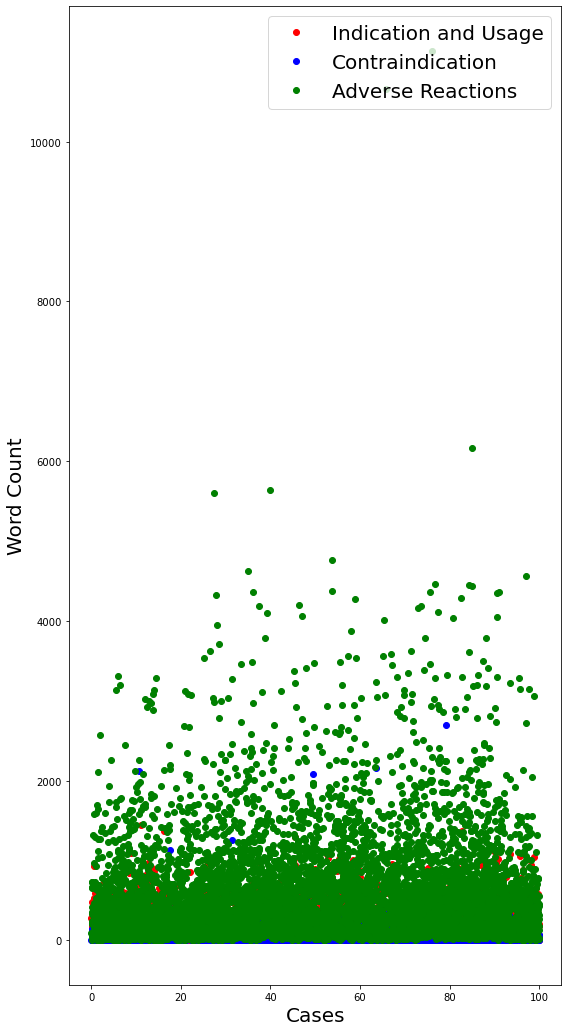

In [14]:
fig = plt.figure(figsize=(30, 18))
t = np.linspace(0,100,len(indi_count))
ax1 = fig.add_subplot(1,3,1)
ax1.plot(t, indi_count, 'ro', label = "Indication and Usage")
ax1.plot(t, contra_count, 'bo', label = "Contraindication")
ax1.plot(t, adv_count, 'go',label = "Adverse Reactions")
ax1.set_xlabel('Cases',fontsize = 20)
ax1.set_ylabel('Word Count',fontsize = 20)
ax1.legend(loc = 1, fontsize = 20)

plt.show()

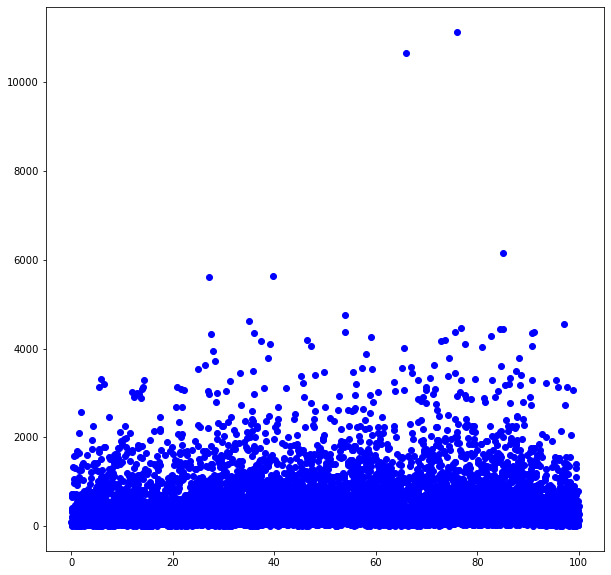

In [333]:
t = np.linspace(0,100,len(indi_count))

fig = plt.figure(figsize=(10, 10))

ax = fig.add_subplot(1,1,1)
ax.plot(t, adv_count, 'bo')

plt.show()

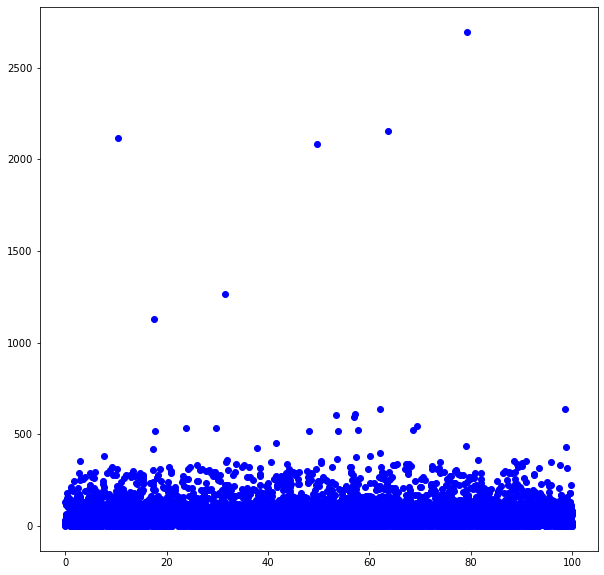

In [334]:
t = np.linspace(0,100,len(indi_count))

fig = plt.figure(figsize=(10, 10))

ax = fig.add_subplot(1,1,1)
ax.plot(t, contra_count, 'bo')

plt.show()

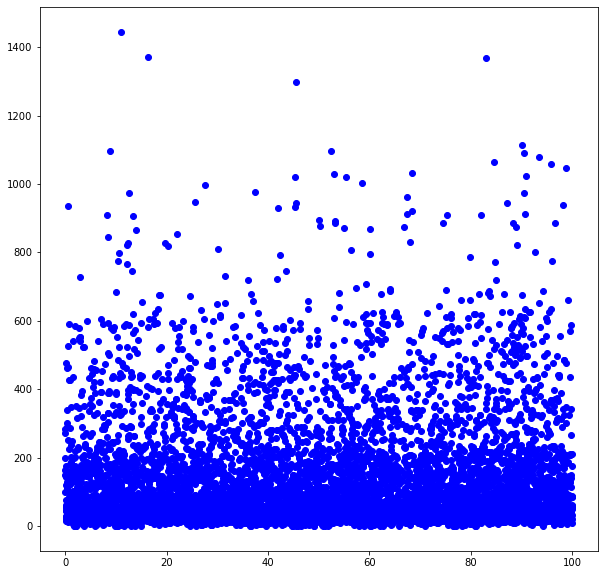

In [335]:
t = np.linspace(0,100,len(indi_count))

fig = plt.figure(figsize=(10, 10))

ax = fig.add_subplot(1,1,1)
ax.plot(t, indi_count, 'bo')

plt.show()

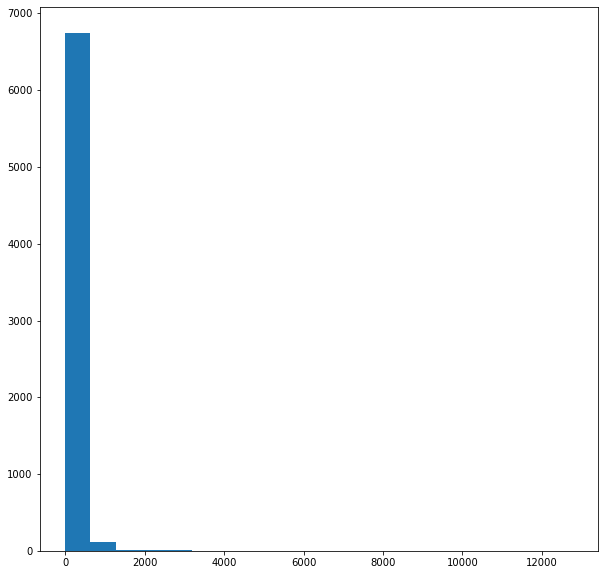

In [197]:
# We can set the number of bins with the `bins` kwarg
fig = plt.figure(figsize=(10, 10))

ax = fig.add_subplot(1,1,1)

ax.hist(indi_count, bins=20)

plt.show()